### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [118]:
#your answer here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [119]:
data = pd.read_csv('data.csv')
item = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [121]:
data.shape

(100000, 4)

In [122]:
data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [123]:
data.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [124]:
# use sum on the default axis
item.sum()

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

#### 5. Find the movies that have more than one genre - 2.5 marks

In [125]:
#hint: use sum on the axis = 1
item.drop('movie id', axis=1,inplace=True)
item[item.sum(axis=1) > 1]['movie title']

0                                 Toy Story 
1                                 GoldenEye 
3                                Get Shorty 
4                                   Copycat 
6                            Twelve Monkeys 
7                                      Babe 
9                               Richard III 
10                            Seven (Se7en) 
11                      Usual Suspects, The 
13                              Postino, Il 
15              French Twist (Gazon maudit) 
16                      From Dusk Till Dawn 
19                       Angels and Insects 
20                   Muppet Treasure Island 
21                               Braveheart 
22                              Taxi Driver 
23                      Rumble in the Bronx 
27                                Apollo 13 
28                           Batman Forever 
30                             Crimson Tide 
32                                Desperado 
33                     Doom Generation, The 
34        

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [126]:
item.drop('unknown',axis=1,inplace=True)
item.head()

,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Copycat,01-Jan-1995,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use bar plot for rating, countplot/distplot for age; release date and countplot for gender and occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below

In [372]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


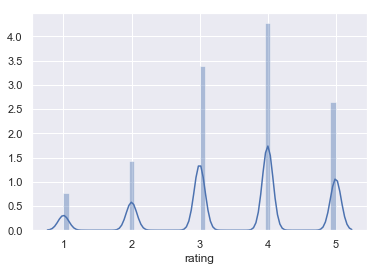

In [127]:
#your answers here
data['rating']
sns.distplot(data['rating'])

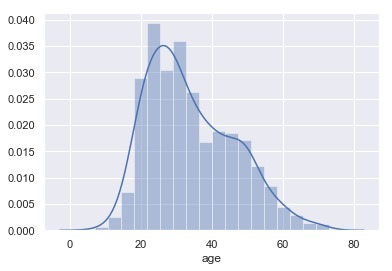

In [128]:
sns.distplot(user['age'])

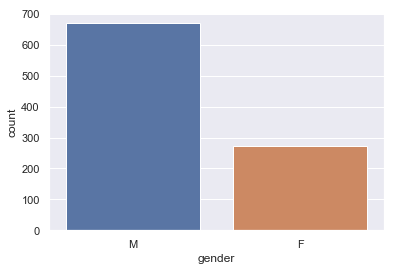

In [129]:
sns.countplot(user['gender'])

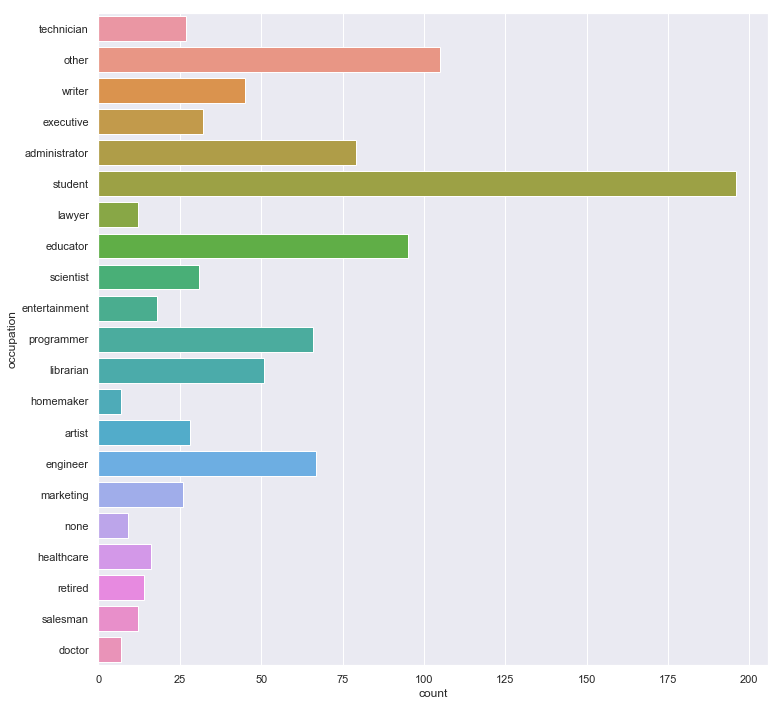

In [130]:
fig,ax=plt.subplots()
fig.set_size_inches(12,12)
sns.countplot(x=None,y=user['occupation'],ax=ax)

In [131]:
splitter = lambda x:str(x).split('-')[2]
item['release year'] = item['release date'].apply(splitter)
item['release year']

0       1995
1       1995
2       1995
3       1995
4       1995
5       1995
6       1995
7       1995
8       1995
9       1996
10      1995
11      1995
12      1995
13      1994
14      1996
15      1995
16      1996
17      1995
18      1995
19      1995
20      1996
21      1996
22      1996
23      1996
24      1996
25      1995
26      1995
27      1995
28      1995
29      1967
        ... 
1651    1996
1652    1998
1653    1994
1654    1998
1655    1996
1656    1996
1657    1996
1658    1996
1659    1994
1660    1997
1661    1997
1662    1997
1663    1997
1664    1997
1665    1997
1666    1997
1667    1997
1668    1998
1669    1998
1670    1993
1671    1995
1672    1962
1673    1996
1674    1996
1675    1996
1676    1998
1677    1998
1678    1998
1679    1994
1680    1996
Name: release year, Length: 1681, dtype: object

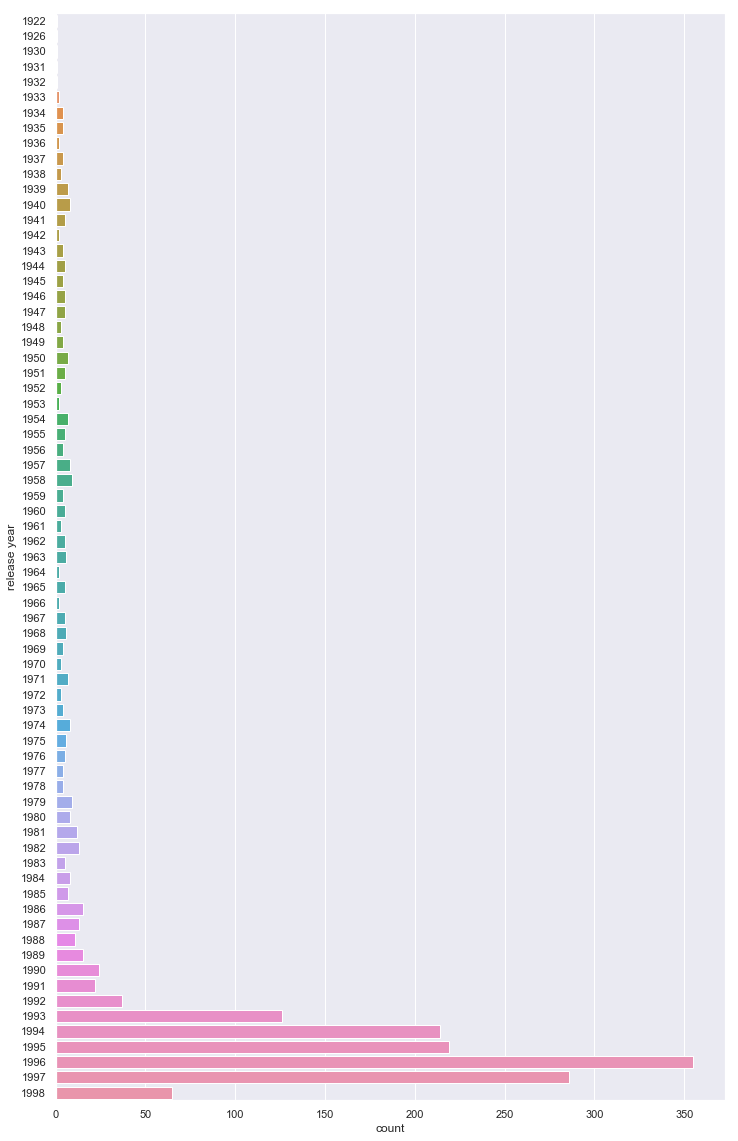

In [132]:
fig,ax = plt.subplots()
fig.set_size_inches(12,20)
sns.countplot(y=item['release year'],ax=ax)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [133]:
#Your answer here
item2 = item.groupby('release year')
item2.sum()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1933,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1934,0,0,0,0,2,0,0,1,0,0,0,1,1,1,0,0,0,0
1935,0,0,0,0,2,0,0,0,0,0,1,1,0,1,0,1,0,0
1936,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


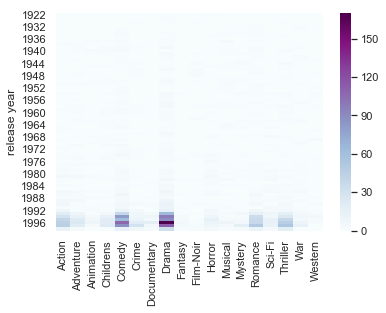

In [134]:
sns.heatmap(item2.sum(),cmap='BuPu')


### 9. Find the top 25 movies, each having a minimum of 100 ratings - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [135]:
#your answer here
data.head()
data2 = data.groupby('movie id')
data3 = data2.filter(lambda x:x['rating'].count() > 100)
data3['movie id']
item = pd.read_csv('item.csv')
item[['movie id','movie title']]
mov_min100ratings = pd.merge(data3,item,how='inner',on='movie id')
mov_min100ratings = pd.DataFrame({'movie id':mov_min100ratings['movie id'].unique()})
data4 = pd.DataFrame(data.groupby('movie id')['rating'].mean())
mov_min100ratingswithavgratings = pd.merge(mov_min100ratings,data4,how='inner',on='movie id')
mov_min100ratingswithavgratings.sort_values('rating',ascending=False,inplace=True)
mov_min100ratingswithavgratings.head(25)
top_25_mov = pd.merge(item,mov_min100ratingswithavgratings.head(25),how='inner',on='movie id')
top_25_mov.sort_values('rating',ascending=False,inplace=True)
top_25_mov['movie title']

15                                      Close Shave, A 
13                                    Schindler's List 
6                                  Wrong Trousers, The 
20                                          Casablanca 
2                            Shawshank Redemption, The 
23                                         Rear Window 
0                                  Usual Suspects, The 
1                                            Star Wars 
9                                         12 Angry Men 
5                                         Citizen Kane 
16                               To Kill a Mockingbird 
14                     One Flew Over the Cuckoo's Nest 
3                            Silence of the Lambs, The 
19                                  North by Northwest 
4                                       Godfather, The 
11                                      Secrets & Lies 
10                                   Good Will Hunting 
24                           Manchurian Candidat

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [136]:
data = pd.read_csv('data.csv')
item = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

In [137]:
all_women = pd.DataFrame({'user id':user[user['gender'] == 'F']['user id']})
all_men  = pd.DataFrame({'user id':user[user['gender'] == 'M']['user id']})

In [138]:
all_women_rating = pd.merge(all_women,data,how='inner',on='user id')
all_women_rating_count = all_women_rating['rating'].count()
all_women_rating_count

25740

In [139]:
all_men_rating = pd.merge(all_men,data,how='inner',on='user id')
all_men_rating_count = all_men_rating['rating'].count()
all_men_rating_count

74260

In [140]:
all_drama_item = pd.DataFrame({'movie id':item[item['Drama'] == 1]['movie id']})
all_drama_rating = pd.merge(data,all_drama_item,how='inner',on='movie id')
all_drama_rating_wom = pd.merge(all_women_rating,all_drama_rating,how='inner',on=['user id','movie id'])
all_drama_rating_wom_count = pd.DataFrame({'rating':all_drama_rating_wom.count()}).loc['rating_x']
perc_wom_watch_drama = all_drama_rating_wom_count.div(all_women_rating_count)
perc_wom_watch_drama

rating    0.427661
Name: rating_x, dtype: float64

In [141]:
all_drama_rating_men = pd.merge(all_men_rating,all_drama_rating,how='inner',on=['user id','movie id'])
all_drama_rating_men_count = pd.DataFrame({'rating':all_drama_rating_men.count()}).loc['rating_x']
perc_men_watch_drama = all_drama_rating_men_count.div(all_men_rating_count)
perc_men_watch_drama

rating    0.388998
Name: rating_x, dtype: float64

Since perc_wom_watch_drama(42.8%) is more than perc_men_watch_drama(38.9%). Therefore more women watch drama movies than men.

In [142]:
all_scifi_item = pd.DataFrame({'movie id':item[item['Sci-Fi'] == 1]['movie id']})
all_scifi_rating = pd.merge(data,all_scifi_item,how='inner',on='movie id')
all_scifi_rating_wom = pd.merge(all_women_rating,all_scifi_rating,how='inner',on=['user id','movie id'])
all_scifi_rating_wom_count = pd.DataFrame({'rating':all_scifi_rating_wom.count()}).loc['rating_x']
perc_wom_watch_scifi = all_scifi_rating_wom_count.div(all_women_rating_count)
perc_wom_watch_scifi

rating    0.102137
Name: rating_x, dtype: float64

In [143]:
all_scifi_rating_men = pd.merge(all_men_rating,all_scifi_rating,how='inner',on=['user id','movie id'])
all_scifi_rating_men_count = pd.DataFrame({'rating':all_scifi_rating_men.count()}).loc['rating_x']
perc_men_watch_scifi = all_scifi_rating_men_count.div(all_men_rating_count)
perc_men_watch_scifi

rating    0.136022
Name: rating_x, dtype: float64

Since perc_wom_watch_drama(10.2%) is less than perc_men_watch_drama(13.6%). Therefore more men watch sci-fi movies than women.

In [144]:
all_rom_item = pd.DataFrame({'movie id':item[item['Romance'] == 1]['movie id']})
all_rom_rating = pd.merge(data,all_rom_item,how='inner',on='movie id')
all_rom_rating_wom = pd.merge(all_women_rating,all_rom_rating,how='inner',on=['user id','movie id'])
all_rom_rating_wom_count = pd.DataFrame({'rating':all_rom_rating_wom.count()}).loc['rating_x']
perc_wom_watch_rom = all_rom_rating_wom_count.div(all_women_rating_count)
perc_wom_watch_rom

rating    0.227584
Name: rating_x, dtype: float64

In [145]:
all_rom_rating_men = pd.merge(all_men_rating,all_rom_rating,how='inner',on=['user id','movie id'])
all_rom_rating_men_count = pd.DataFrame({'rating':all_rom_rating_men.count()}).loc['rating_x']
perc_men_watch_rom = all_rom_rating_men_count.div(all_men_rating_count)
perc_men_watch_rom

rating    0.183181
Name: rating_x, dtype: float64

Since perc_wom_watch_rom(22.8%) is more than perc_men_watch_rom(18.3%). Therefore more women watch romance movies than men.